# Apriori Analysis

## install libs

In [ ]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


## import libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [ ]:
dataset = pd.read_csv('D14data3.csv',header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(7501, 20)

## generate transactions

In [ ]:
# converting dataframe into list of lists
transaction = []
for i in range(1, 7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0, 20)])

In [ ]:
# transaction[:3] #debug

## Apriori Rules

In [ ]:
from apyori import apriori

In [ ]:
rules = apriori(transaction, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
# defining MinSup, MinConf, MinLift and MinLength using transaction data to generate rules
rules

<generator object apriori at 0x000001F089928820>

In [ ]:
# converting rules into list
results = list(rules)
results[:2]

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])]

## Rules' Combinations

In [ ]:
for i in range(0, len(results)):
    print(results[i][0])
# printing combinations from rules

frozenset({'light cream', 'chicken'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'shrimp', 'pasta'})
frozenset({'nan', 'light cream', 'chicken'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'ground beef', 'spaghetti', 'cooking oil'})
frozenset({'nan', 'escalope', 'mushroom cream sauce'})
frozenset({'nan', 'escalope', 'pasta'})
frozenset({'frozen vegetables', 'ground beef', 'spaghetti'})
frozenset({'frozen vegetables', 'olive oil', 'milk'})
frozenset({'frozen vegetables', 'shrimp', 'mineral water'})
frozenset({'frozen vegetables', 'spaghetti', 'olive oil'})
frozenset({'frozen vegetables', 'shrimp', 'spaghetti'})
frozenset({'tomatoes', 'frozen vegetables', 'spaghetti'})
frozenset({'ground beef', 'spaghetti', 'grated cheese'})
frozenset({'ground beef', 'herb & pepper', 'mineral water'})


## Rules, Support, Confidence and Lift ratio

In [ ]:
# printing Rules, Support, Confidence and Lift ratio
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: shrimp -> pasta
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: nan -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: chocolate -> shrimp
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.2601

# Anomaly Detection

## Unsupervised Outlier Detection
- it uses two techniques
    1. ```Local Outlier Factor (LOF)```
        - anamoly score of each sample
        - measures the ```deviation of density``` of a given sample w.r.t. to its neighbors
        - it is local in that the anamoly score depends on how isolated the object is with respect to the surrounding neighborhood
    2. ```Isolation Forest Algorithm```
        - isolates observations by randomly selecting a feature and then randomly selecting  a split value between the maximum and minimum values of the selected feature
        - Since recursive partitioning can be represented by a tree structure, the number of splits required to isolate a sample is equivalent to the path length from the root node to the terminating node
        - this path length, averaged over a forest of such random trees, is a ```measure of normality``` and our ```decision function```
        - Random partitioning produces noticeably shorter paths for anomalies, hence when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be ```anomalies```

## install libs

In [ ]:
# pip install glemaitre imbalanced-learn imblearn

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## import libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# creditcard.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [ ]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### EDA

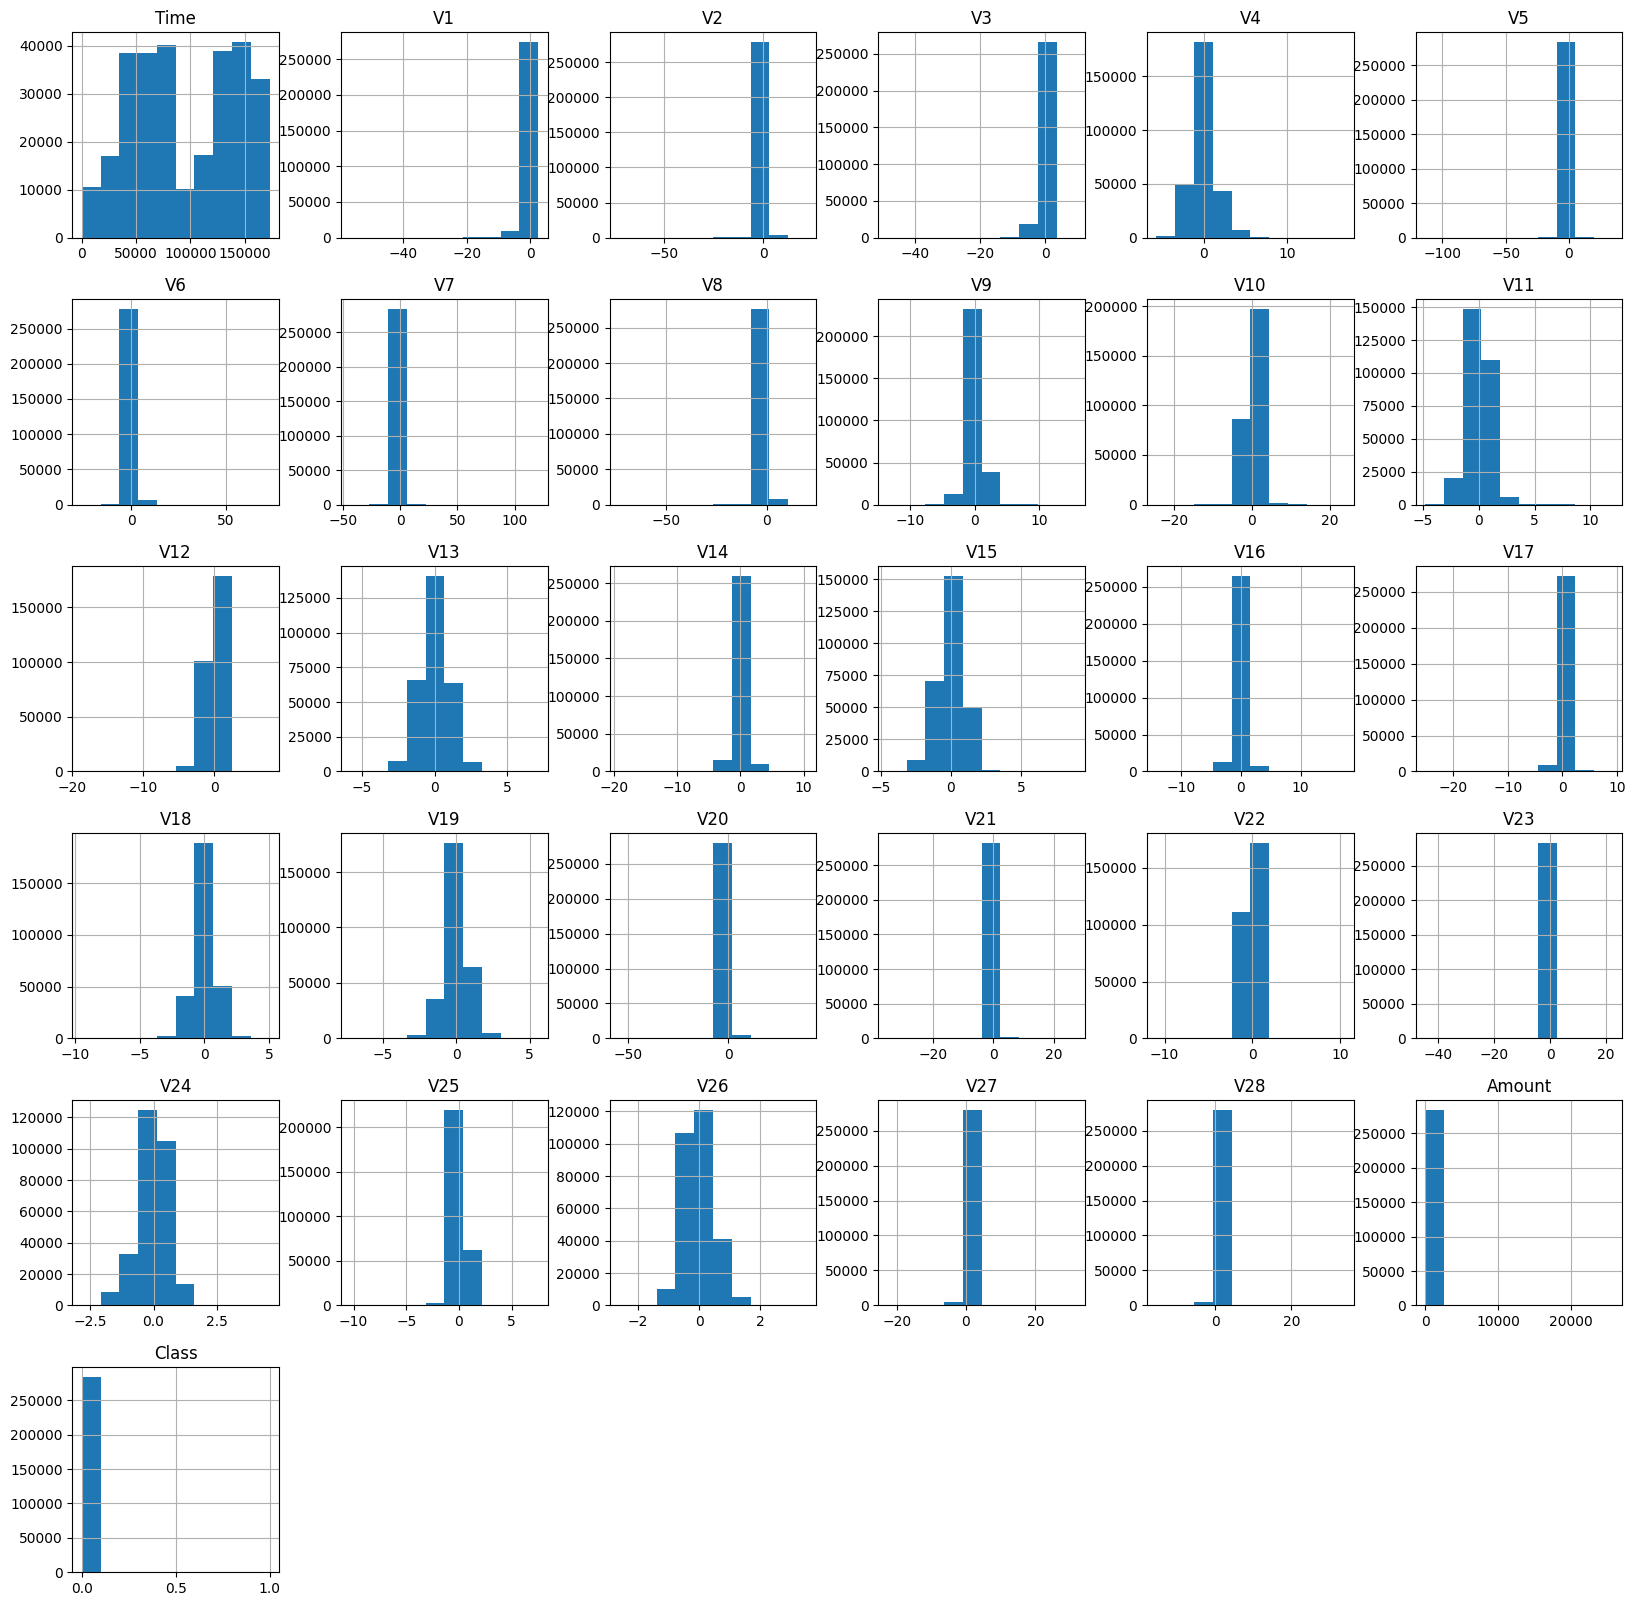

In [ ]:
dataset.hist(figsize=(20, 20))
plt.show()

In [ ]:
Fraud = dataset[dataset['Class'] == 1]
Fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
Fraud.shape

(492, 31)

In [ ]:
Valid = dataset[dataset['Class'] == 0]
Valid.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
Valid.shape

(284315, 31)

### Outlier Fraction

In [ ]:
outlier_fraction = len(Fraud) / float(len(Valid))
outlier_fraction

0.0017304750013189597

### Correlation

<Axes: >

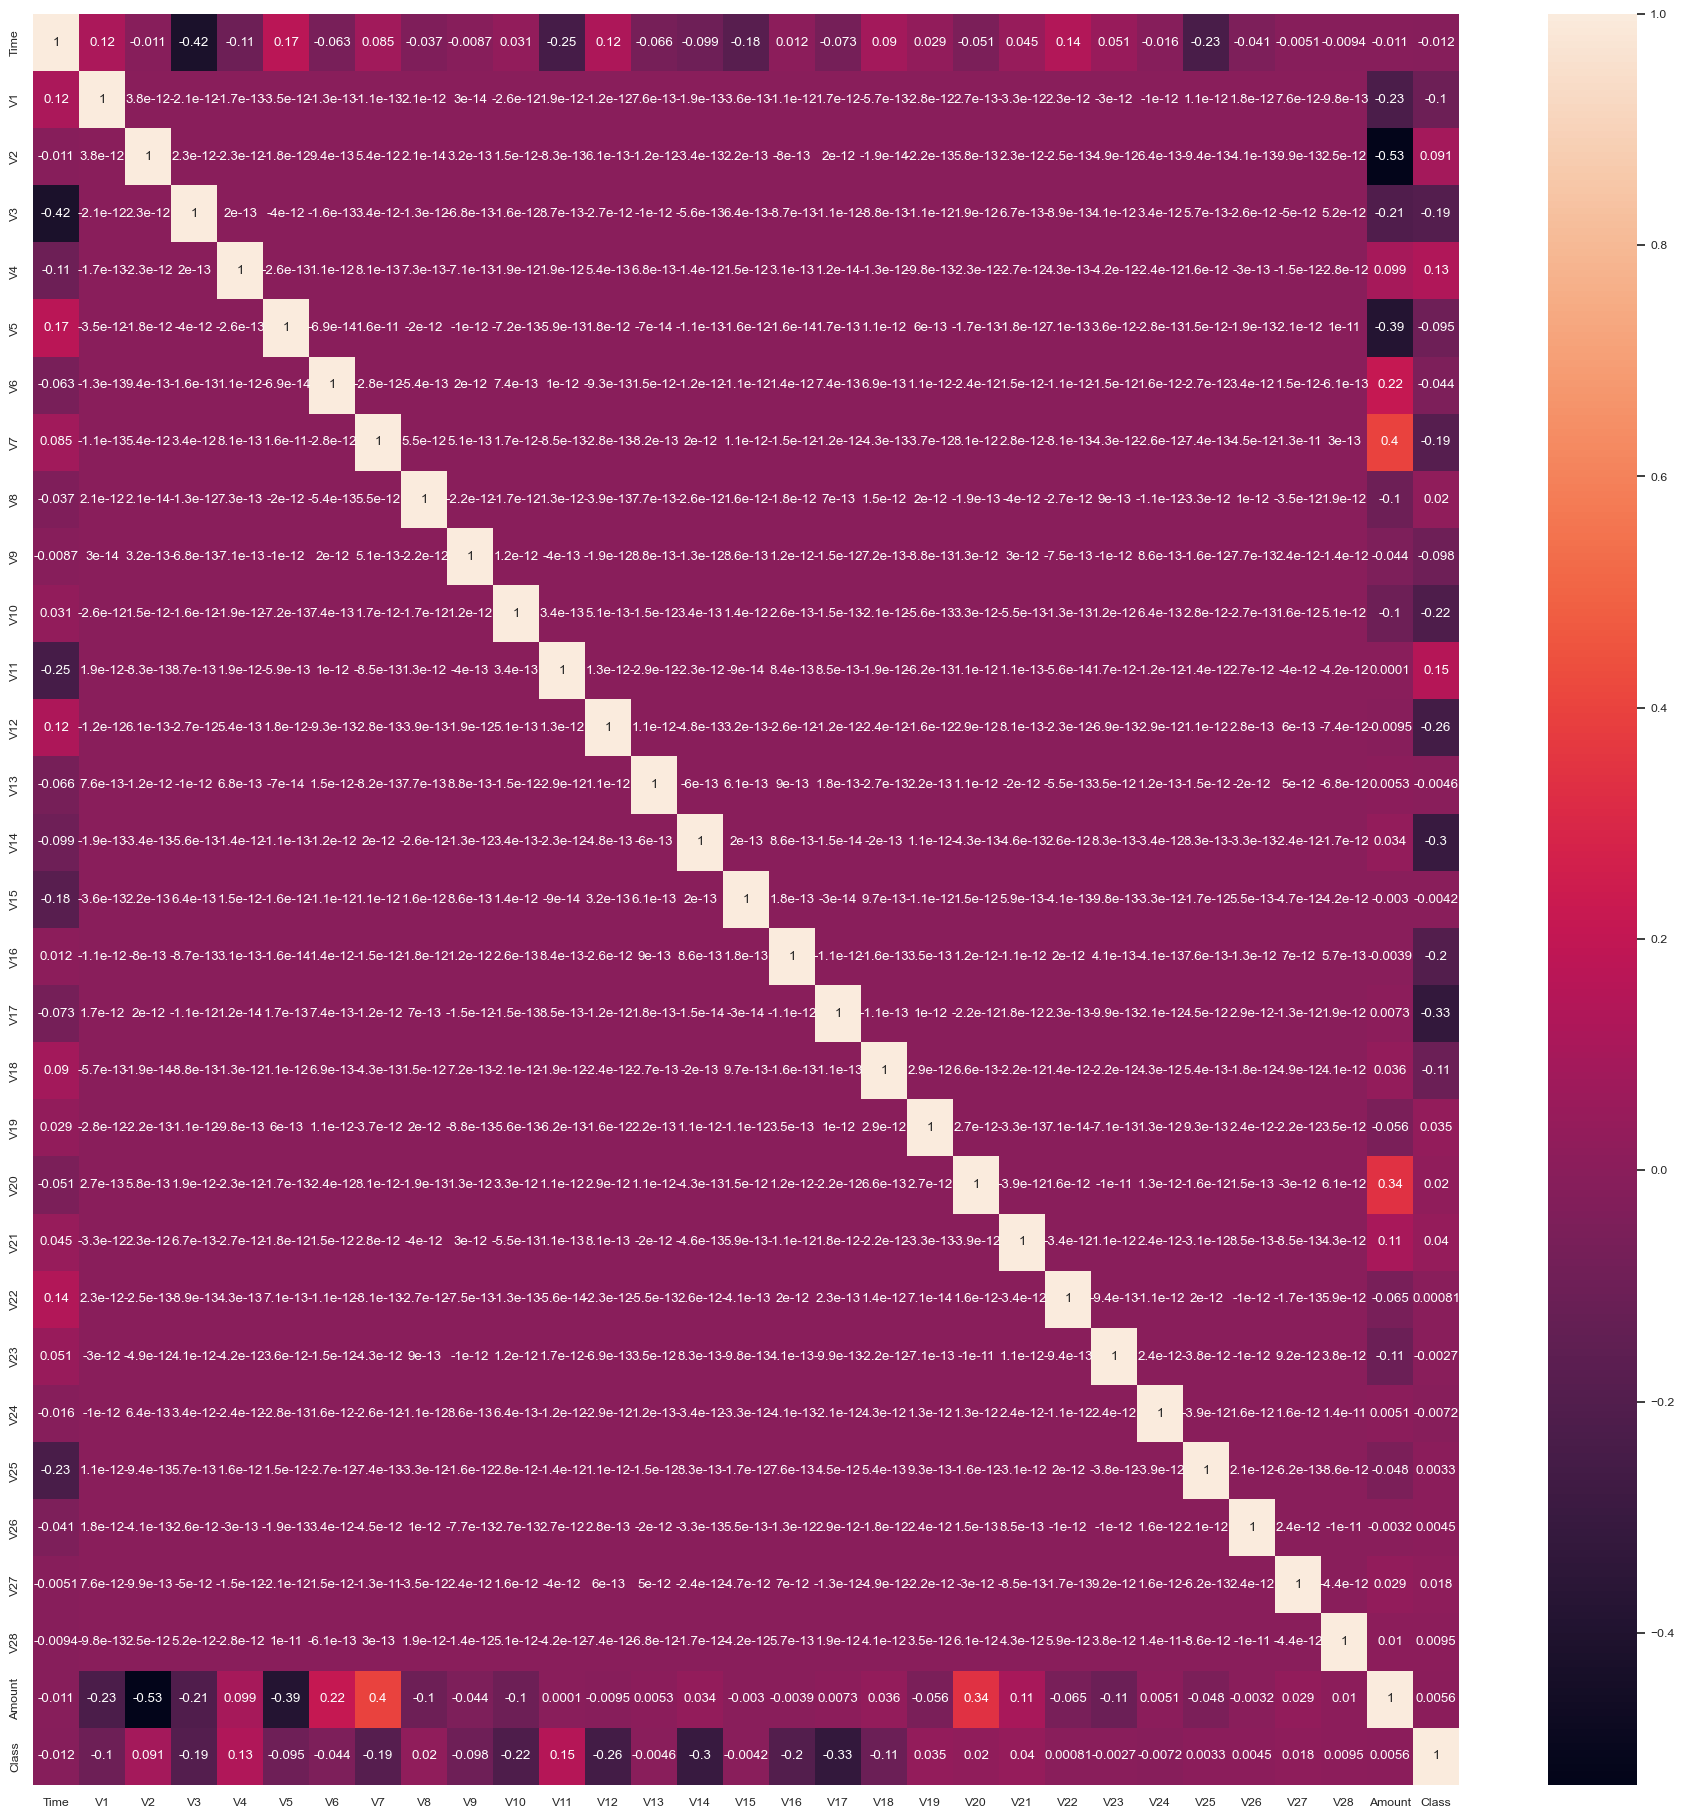

In [ ]:
corrmat = dataset.corr()
fig = plt.figure(figsize=(23, 23))
sns.set(font_scale = 0.8)
sns.heatmap(corrmat, annot=True)

### identifying X & Y

In [ ]:
x = dataset.iloc[ : , :-1].values
x[:2]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811730e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979010e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905800e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067780e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280750e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176490e-02,
        -8.23608090e-02, -7.88029830e-02,  8.51016550e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45783041e-01, -6.90831350e-

In [ ]:
y = dataset.iloc[ : , -1].values
y[:2]

array([0, 0], dtype=int64)

In [ ]:
x.shape

(284807, 30)

In [ ]:
y.shape

(284807,)

### splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### IsolationForest & LocalOutlierFactor

In [ ]:
from sklearn.ensemble import IsolationForest
# Isolation Forest Algorithm

# The Isolation Forest isolates observation by randomly selecting a feature
# and then randomly selecting a split value between
# the maximum and minimum values of the selected features

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# Unsupervised Outlier Detection using the Local Outlier Factor (LOF)
# to find neighbor

In [ ]:
# define random states
state = 1
# define outlier detection tools to eb compared
classifier = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                        contamination=outlier_fraction,
                                        random_state=1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=outlier_fraction)
}

In [ ]:
n_outliers = len(Fraud)

In [ ]:
for i, (clf_name, clf) in enumerate(classifier.items()):
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_anamoly = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred_anamoly = clf.predict(x)

In [ ]:
# reshape the prediction values to 0 for valid, 1 for fraud
y_pred_anamoly[y_pred_anamoly == 1] = 0
y_pred_anamoly[y_pred_anamoly == -1] = 1

In [ ]:
n_errors = (y_pred_anamoly != y).sum()
n_errors

935

### Evaluation

#### accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, y_pred_anamoly)

0.9967170750718908

#### classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_pred_anamoly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



#### confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y, y_pred_anamoly)
cm

array([[283847,    468],
       [   467,     25]], dtype=int64)

In [ ]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
print(TP)
print(TN)
print(FP)
print(FN)

283847
25
468
467


#### precision

In [ ]:
precision = TP / float(TP + FP)
precision

0.9983539384133795

#### recall

In [ ]:
recall = TP / float(TP + FN)
recall

0.9983574498617726

#### tpr

In [ ]:
tpr = TP/float(TP+FN)
tpr

0.9983574498617726

#### fpr

In [ ]:
fpr = FP/float(FP + TN)
fpr

0.949290060851927

#### roc_curve

In [ ]:
from sklearn.metrics import roc_curve

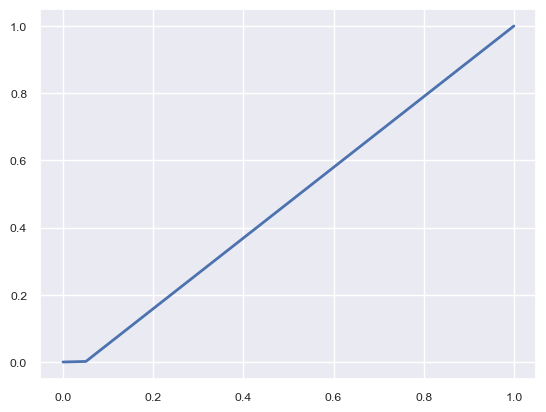

In [ ]:
tpr, fpr, threshold = roc_curve(y, y_pred_anamoly)
plt.plot(fpr, tpr, linewidth=2)
plt.show()

# Time Series Data Application
- set of data collected and arranged in accordance of time
- According to Croxton and Cowdon, "A time series consist of data arranged chronologically"
- used for non-stationary data, data which is constantly fluctuating over time or are affected by time
- helps to predict the future behavior of variable based on past experience
- Time Series can be decomposed into four components, each expressing a particular aspect of the movement of the values of the time series
    1. ```Secular Trend```
        - describes movement along the trend
    2. ```Seasonal Variations```
        - represents seasonal changes
    3. ```Cyclical Fluctuations```
        - corresponds to periodical but not seasonal variations
    4. ```Irregular Variations```
        - other non-random sources of variations
- Two types of time series data
    1. ```Metrics```
        - measurements gathered at regular intervals of time
    2. ```Events```
        - measurements gathered at irregular intervals of time
- Three types of models for time series
    1. Moving Average (```MA```)
    2. Exponential Smoothing (```ES```)
    3. AutoRegressive Integrated Moving Average (```AR``` / ```ARIMA```)
- CHaracteristics of Time Series
    - Time Series Exhibits one or more of the following features
        1. Trends
        2. Seasonal Cycles
        3. Non-Seasonal Cycles
        4. Pulses and Steps
        5. Outliers

## importing libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## importing dataset

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [ ]:
dataset = pd.read_csv('D15data1.csv')
dataset.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [ ]:
dataset.shape

(3650, 2)

In [ ]:
dataset.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


## converting  string type to date type

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format="mixed")

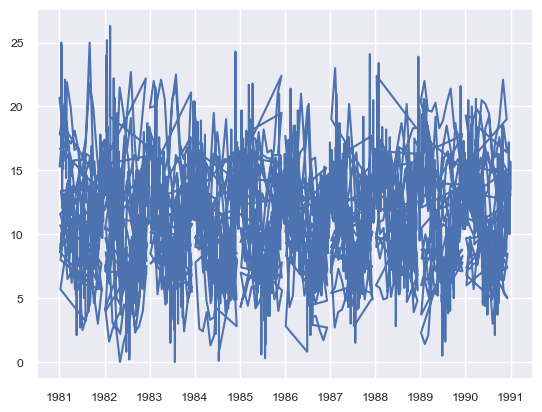

In [ ]:
# date vs Temp plot
plt.plot(dataset['Date'], dataset['Temp'])

In [ ]:
dataset['M12'] = dataset['Temp'].rolling(12).mean()

In [ ]:
dataset['Month'] = [i.month for i in dataset['Date']]
dataset.head()

,Date,Temp,M12,Month
0,1981-01-01,20.7,NaN,1
1,1981-02-01,17.9,NaN,2
2,1981-03-01,18.8,NaN,3
3,1981-04-01,14.6,NaN,4
4,1981-05-01,15.8,NaN,5


In [ ]:
dataset['Year'] = [i.year for i in dataset['Date']]
dataset.head()

,Date,Temp,M12,Month,Year
0,1981-01-01,20.7,NaN,1,1981
1,1981-02-01,17.9,NaN,2,1981
2,1981-03-01,18.8,NaN,3,1981
3,1981-04-01,14.6,NaN,4,1981
4,1981-05-01,15.8,NaN,5,1981


In [ ]:
dataset['Series'] = np.arange(1, len(dataset)+1)
dataset.head()

,Date,Temp,M12,Month,Year,Series
0,1981-01-01,20.7,NaN,1,1981,1
1,1981-02-01,17.9,NaN,2,1981,2
2,1981-03-01,18.8,NaN,3,1981,3
3,1981-04-01,14.6,NaN,4,1981,4
4,1981-05-01,15.8,NaN,5,1981,5


In [ ]:
dataset.drop(['Date', 'M12'], axis=1, inplace=True)
dataset.head()

,Temp,Month,Year,Series
0,20.7,1,1981,1
1,17.9,2,1981,2
2,18.8,3,1981,3
3,14.6,4,1981,4
4,15.8,5,1981,5


In [ ]:
dataset = dataset[['Series', 'Year', 'Month', 'Temp']]

## Identify X & Y

In [ ]:
x = dataset.iloc[ : , :-1].values
x[:5]

array([[   1, 1981,    1],
       [   2, 1981,    2],
       [   3, 1981,    3],
       [   4, 1981,    4],
       [   5, 1981,    5]], dtype=int64)

In [ ]:
y = dataset.iloc[ : , -1].values
y[:5]

array([20.7, 17.9, 18.8, 14.6, 15.8])

## Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [ ]:
x_train[:5]

array([[3562, 1990,    4],
       [1062, 1983,   11],
       [ 998, 1983,    9],
       [1556, 1985,    6],
       [2887, 1988,   11]], dtype=int64)

In [ ]:
y_train[:5]

array([11. , 15.8,  7.6, 15.9, 11.8])

## Modeling- Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_ts = LinearRegression()

## Training- Linear Regression

In [ ]:
linreg_ts.fit(x_train, y_train)

LinearRegression()

## Prediction- Linear Regression

In [ ]:
y_pred_ts = linreg_ts.predict(x_test)
y_pred_ts[:5]

array([10.94451163, 10.9524679 , 10.45613512, 10.45347194, 13.26754352])

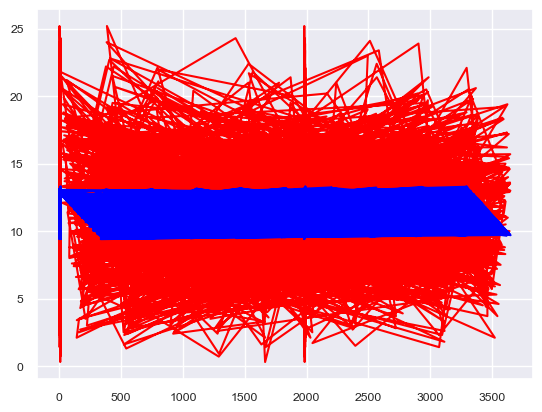

In [ ]:
plt.plot(x_train, y_train, color='red')
# Training datav plot: x_train vs y_train
plt.plot(x_train, linreg_ts.predict(x_train), color='blue')
# Training Prediction plot : x_train vs predict(y_train)

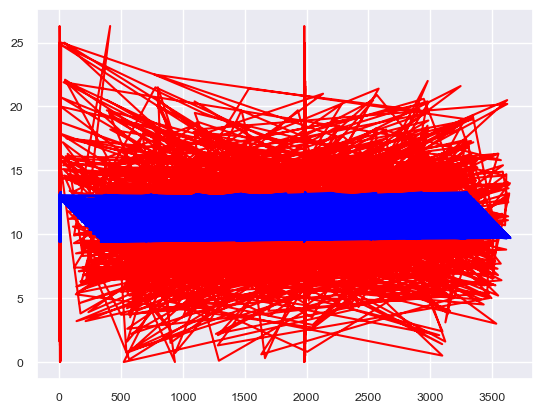

In [ ]:
plt.plot(x_test, y_test, color='red')
# Testing Data Plot : x_test vs y_test
plt.plot(x_train, linreg_ts.predict(x_train), color='blue')
# Training Prediction plot : x_train vs predict(y_train)
# to check for overfitting